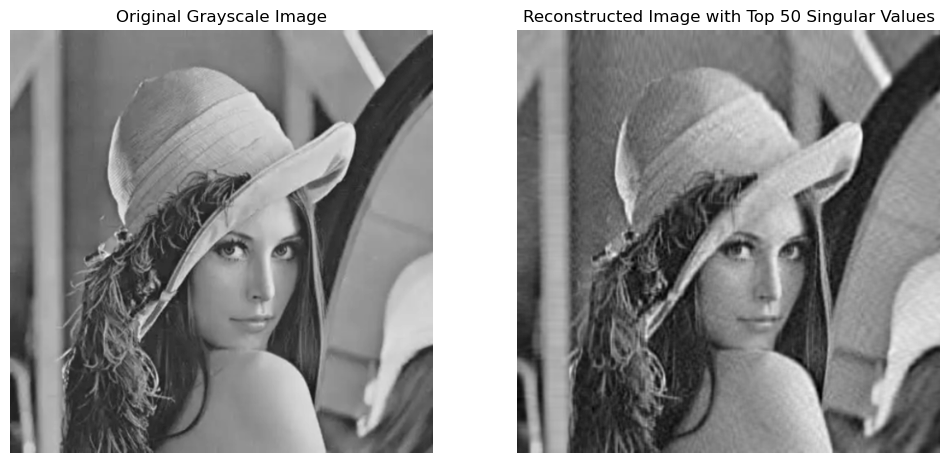

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

def image_to_grayscale_matrix(image_path):
    with Image.open(image_path) as img:
        grayscale_img = img.convert('L')
        grayscale_matrix = np.array(grayscale_img, dtype=float)
    return grayscale_matrix

def process_image_svd(A, num_singular_values=50):
    # 对输入矩阵A执行奇异值分解
    U, Sigma, VT = np.linalg.svd(A, full_matrices=False)
    
    # 创建新的奇异值数组，只保留最大的num_singular_values个奇异值
    Sigma_new = np.zeros_like(Sigma)
    Sigma_new[:num_singular_values] = Sigma[:num_singular_values]
    
    # 使用新的奇异值重建原始矩阵
    A_reconstructed = U @ np.diag(Sigma_new) @ VT
    
    # 确保重建的矩阵是实数矩阵
    A_reconstructed = np.real(A_reconstructed)

    # 归一化重建矩阵到 [0, 255] 的范围
    min_val = A_reconstructed.min()
    max_val = A_reconstructed.max()
    if max_val - min_val > 0:  # 防止除以零
        A_reconstructed = ((A_reconstructed - min_val) / (max_val - min_val) * 255).astype(np.uint8)
    else:
        A_reconstructed = np.ones_like(A_reconstructed, dtype=np.uint8) * 128  # 如果所有像素相同，则设为中间灰度值

    return A_reconstructed

image_path = r"C:\Users\97567\Pictures\tpic\tdjjh-5nh8o.png"  # 替换为你的图像路径
grayscale_matrix = image_to_grayscale_matrix(image_path)

# 调用函数处理图像，保留最大的50个奇异值
A_reconstructed = process_image_svd(grayscale_matrix)


cv2.imwrite(r'C:\Users\97567\Pictures\tpic\reconstructed_image.png', A_reconstructed)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(grayscale_matrix, cmap='gray', vmin=0, vmax=255)
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(A_reconstructed, cmap='gray', vmin=0, vmax=255)
plt.title('Reconstructed Image with Top 50 Singular Values')
plt.axis('off')

plt.show()